In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import RobustScaler, Normalizer, MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,precision_score, f1_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
df = pd.read_csv("train_dataset.csv")

In [3]:
df.head()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,35,170,85,97.0,0.9,0.9,1,1,118,78,...,70,142,19.8,1,1.0,61,115,125,1,1
1,20,175,110,110.0,0.7,0.9,1,1,119,79,...,71,114,15.9,1,1.1,19,25,30,1,0
2,45,155,65,86.0,0.9,0.9,1,1,110,80,...,57,112,13.7,3,0.6,1090,1400,276,0,0
3,45,165,80,94.0,0.8,0.7,1,1,158,88,...,46,91,16.9,1,0.9,32,36,36,0,0
4,20,165,60,81.0,1.5,0.1,1,1,109,64,...,47,92,14.9,1,1.2,26,28,15,0,0


In [4]:
# Checking if our data has any null values
df.isnull().sum()

age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
dental caries          0
smoking                0
dtype: int64

In [5]:
df.columns

Index(['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic',
       'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
       'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST',
       'ALT', 'Gtp', 'dental caries', 'smoking'],
      dtype='object')

In [6]:
#Assigning age groups for every age range.
def create_age_groups(age):
    if 18 <= age <= 44:
        return 'Young adult'
    elif 45 <= age <= 64:
        return 'Middle-aged'
    else:
        return 'Older adult'


df["age group"]= df['age'].apply(create_age_groups)


In [7]:
# Defining grouping data function

def group_data(df, column, smoker):
    """
    If you want to group smokers, 
    smoker = 1, other wise 0 
    """
    
    grouped_data = df[df['smoking'] == smoker].groupby('age group')[column].mean()
    return grouped_data

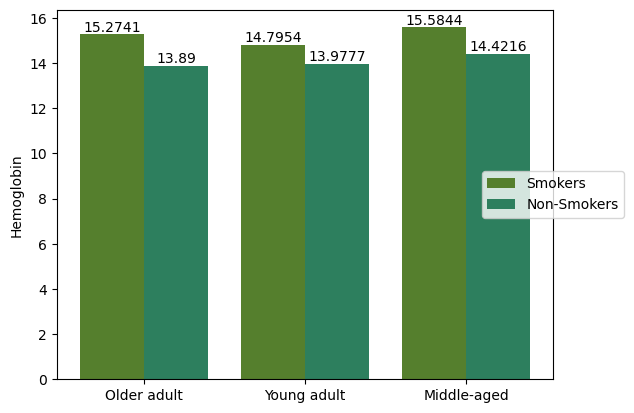

In [9]:
grouped_h_smokers = group_data(df,"hemoglobin",1)
grouped_h_non_smokers = group_data(df,"hemoglobin",0)

# Creating a list of age groups to use as x-axis labels:
age_groups = list(set(df['age group']))

# Creating an array of indices to use as the x-axis:
x_indices = np.arange(len(age_groups))

# Creating a figure and axis object:
fig, ax = plt.subplots()

# Creating the bar plots for smokers and non-smokers:
ax.bar(x_indices - 0.2, grouped_h_smokers, width=0.4, color='#557f2d', align='center')
ax.bar(x_indices + 0.2, grouped_h_non_smokers, width=0.4, color='#2d7f5e', align='center')

# add value labels on top of each bar
for container in ax.containers:
    ax.bar_label(container)
    
# Setting the ticks and labels:
ax.set_xticks(x_indices)
ax.set_xticklabels(age_groups, rotation=0)
ax.set_ylabel('Hemoglobin')

# Adding a legend:
ax.legend(['Smokers', 'Non-Smokers'],loc='center',bbox_to_anchor=(1.0, 0.5))

# Displaying the plot:
plt.savefig('hemoglobin_bar_chart.png')
plt.show()

In [10]:
# Don't forget to drop the age group column we added

df.drop("age group", axis= 1,inplace=True)

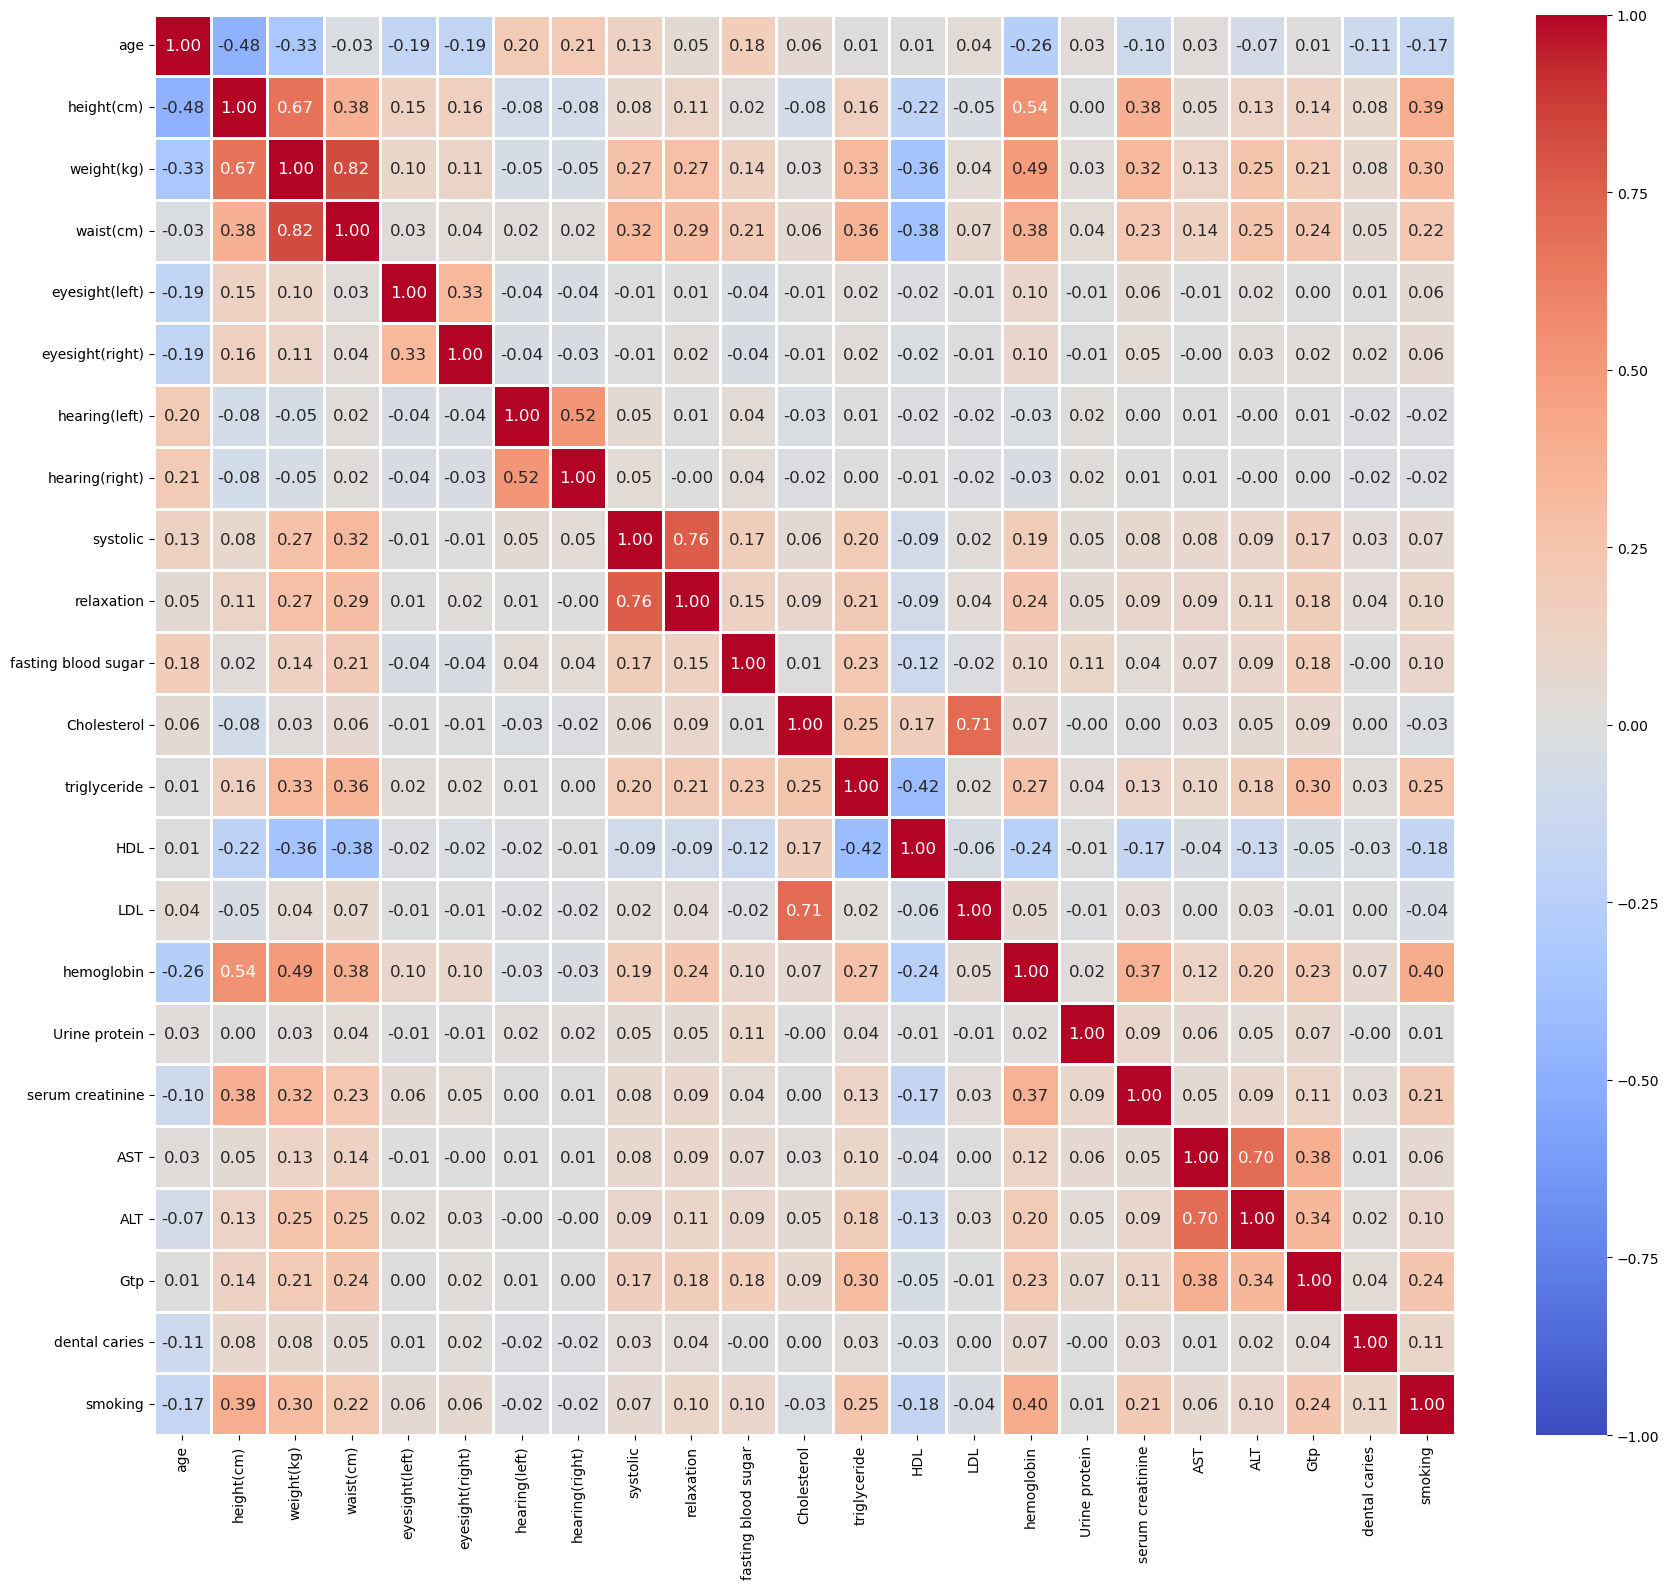

In [11]:
# Viewing correlation matrix plot 
corr_matrix =df.corr()
plt.figure(figsize=(18,16))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True, annot_kws={"size":12},
           linewidths=1, cmap="coolwarm",  fmt=".2f")
plt.tight_layout() 
plt.savefig('corr_matrix.png')
plt.show()

In [12]:
# Assigning the variables whether they are categoric or numerical variables.

def grab_col_names(dataframe, cat_th=10):


    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]

    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]


    cat_cols = cat_cols + num_but_cat
    

    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'num_but_cat: {len(num_but_cat)}')



    return cat_cols, num_cols, num_but_cat


In [13]:
cat_cols, num_cols, num_but_cat = grab_col_names(df)

Observations: 38984
Variables: 23
cat_cols: 5
num_cols: 18
num_but_cat: 5


In [14]:
# Defining categorical variable summary function

def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("###############################################################")

    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show()


In [15]:
for col in cat_cols:
    cat_summary(df, col)

   hearing(left)      Ratio
1          37995  97.463062
2            989   2.536938
###############################################################
   hearing(right)      Ratio
1           37963  97.380977
2            1021   2.619023
###############################################################
   Urine protein      Ratio
1          36836  94.490047
2           1236   3.170532
3            667   1.710958
4            182   0.466858
5             58   0.148779
6              5   0.012826
###############################################################
   dental caries     Ratio
0          30625  78.55787
1           8359  21.44213
###############################################################
   smoking      Ratio
0    24666  63.272112
1    14318  36.727888
###############################################################


In [21]:
# Checking the quantiles of the dataframe

print("########################## Quantiles ##########################")
print(df.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)


########################## Quantiles ##########################
                      0.00   0.05   0.50   0.95    0.99    1.00
age                   20.0   25.0   40.0   65.0   75.00    85.0
height(cm)           130.0  150.0  165.0  180.0  185.00   190.0
weight(kg)            30.0   45.0   65.0   90.0  100.00   135.0
waist(cm)             51.0   67.0   82.0   98.0  106.00   129.0
eyesight(left)         0.1    0.4    1.0    1.5    1.50     9.9
eyesight(right)        0.1    0.4    1.0    1.5    1.50     9.9
hearing(left)          1.0    1.0    1.0    1.0    2.00     2.0
hearing(right)         1.0    1.0    1.0    1.0    2.00     2.0
systolic              71.0  100.0  120.0  144.0  158.00   233.0
relaxation            40.0   60.0   76.0   91.0  101.00   146.0
fasting blood sugar   46.0   80.0   96.0  130.0  187.17   423.0
Cholesterol           55.0  141.0  195.0  259.0  293.00   445.0
triglyceride           8.0   46.0  108.0  278.0  363.00   999.0
HDL                    4.0   37.0   55.0

In [22]:
# Defining a function to find to calculate the upper and lower limits 
def outlier_thresholds(dataframe, col_name):
    quartile1 = dataframe[col_name].quantile(0.01)
    quartile3 = dataframe[col_name].quantile(0.99)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [23]:
# Defining the function to check outliers
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True 
    else:
        return False 

In [24]:
# The ones that returns True have outliers
for col in num_cols:
    print(col, check_outlier(df, col))

age False
height(cm) False
weight(kg) False
waist(cm) False
eyesight(left) True
eyesight(right) True
systolic False
relaxation False
fasting blood sugar True
Cholesterol False
triglyceride True
HDL True
LDL True
hemoglobin False
serum creatinine True
AST True
ALT True
Gtp True


In [25]:
# Defining function to replace the outliers with their thresholds
def replace_with_thresholds(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if low_limit > 0:
        dataframe.loc[(dataframe[col_name] < low_limit), col_name] = low_limit
        dataframe.loc[(dataframe[col_name] > up_limit), col_name] = up_limit
    else:
        dataframe.loc[(dataframe[col_name] > up_limit), col_name] = up_limit

In [26]:
for col in num_cols:
    replace_with_thresholds(df, col)

## Scaling

In [27]:
# Applying Robust scaling
for col in num_cols:
    transformer = RobustScaler().fit(df[[col]])
    df[col] = transformer.transform(df[[col]])

In [28]:
df.head()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,-0.333333,0.5,1.00,1.250000,-0.25,-0.25,1,1,-0.111111,0.166667,...,0.789474,0.644444,2.272727,1,0.5,3.80,5.875000,3.666667,1,1
1,-1.333333,1.0,2.25,2.333333,-0.75,-0.25,1,1,-0.055556,0.250000,...,0.842105,0.022222,0.500000,1,1.0,-0.40,0.250000,0.148148,1,0
2,0.333333,-1.0,0.00,0.333333,-0.25,-0.25,1,1,-0.555556,0.333333,...,0.105263,-0.022222,-0.500000,3,-1.5,15.75,15.307812,9.259259,0,0
3,0.333333,0.0,0.75,1.000000,-0.50,-0.75,1,1,2.111111,1.000000,...,-0.473684,-0.488889,0.954545,1,0.0,0.90,0.937500,0.370370,0,0
4,-1.333333,0.0,-0.25,-0.083333,1.25,-2.25,1,1,-0.611111,-1.000000,...,-0.421053,-0.466667,0.045455,1,1.5,0.30,0.437500,-0.407407,0,0


## Logit

In [66]:
X = df.drop("smoking", axis=1)
y = df["smoking"]


In [67]:
#Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [68]:
# Training the logistic regression model using the training data
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

LogisticRegression()

### --Evaluating accuracy on the test data
### --To see how well the model performs on new, unseen data

In [69]:
# Predict the target variable for the test data
y_pred = logmodel.predict(X_test)
    
# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.73


In [70]:
# Checking the first 10 predicted values
y_pred[:10]

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 1], dtype=int64)

In [71]:
# Checking the actual first 10 values
y[:10]

0    1
1    0
2    0
3    0
4    0
5    1
6    0
7    1
8    0
9    0
Name: smoking, dtype: int64

In [72]:
# Checking the predicted probabilities for the first 10 values
logmodel.predict_proba(X_test)[:10]

array([[0.50746662, 0.49253338],
       [0.76490191, 0.23509809],
       [0.30660842, 0.69339158],
       [0.80961092, 0.19038908],
       [0.5412184 , 0.4587816 ],
       [0.97969262, 0.02030738],
       [0.1467468 , 0.8532532 ],
       [0.90726837, 0.09273163],
       [0.71982487, 0.28017513],
       [0.43764548, 0.56235452]])

In [73]:
# Defining a function to create confusion matrix plot
def plot_confusion_matrix(y, y_pred):
    acc = round(accuracy_score(y, y_pred),2)
    cm = confusion_matrix(y, y_pred)
    sns.heatmap(cm, annot=True, fmt='.0f')
    plt.xlabel("Y actual")
    plt.ylabel("Y predicted")
    plt.title("Acc score: {0}".format(acc), size=12)
    plt.show()

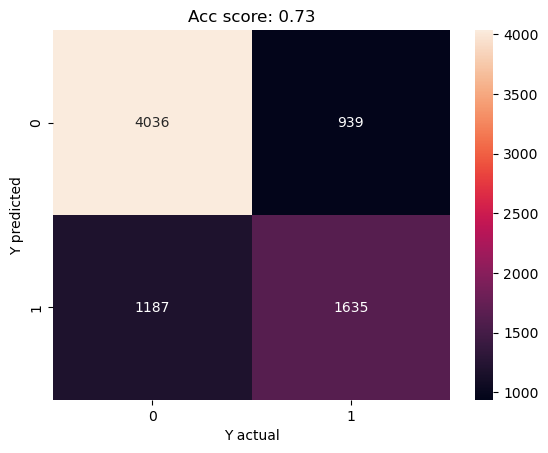

In [74]:
plot_confusion_matrix(y_test, y_pred)

In [75]:
precision_score(y_test, y_pred)

0.6351981351981352

In [76]:
recall_score(y_test,y_pred)

0.579376328844791

In [78]:
f1_score(y_test, y_pred)

0.6060044477390659

In [79]:
# This report returns all 3 scores that are above for both classess
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.81      0.79      4975
           1       0.64      0.58      0.61      2822

    accuracy                           0.73      7797
   macro avg       0.70      0.70      0.70      7797
weighted avg       0.72      0.73      0.72      7797



### --Evaluating accuracy on the training data
### --To get an idea of how well the model fits the training data and whether it is potentially overfitting or not

In [80]:
y_pred = logmodel.predict(X_train)

accuracy = accuracy_score(y_train, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.72


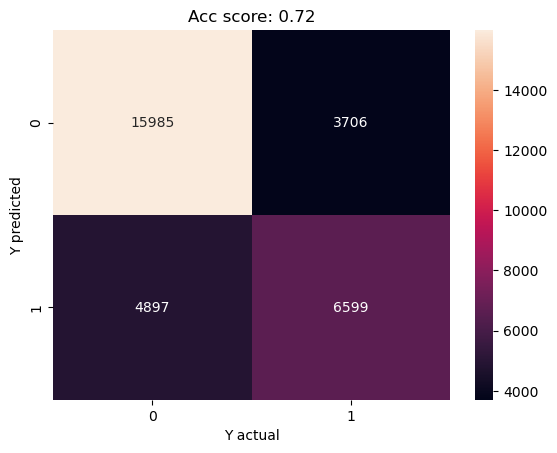

In [81]:
plot_confusion_matrix(y_train, y_pred)

In [82]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.81      0.79     19691
           1       0.64      0.57      0.61     11496

    accuracy                           0.72     31187
   macro avg       0.70      0.69      0.70     31187
weighted avg       0.72      0.72      0.72     31187



## Checking p-values and coefficients

In [83]:
# Fitting the logistic regression model
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# Get the coefficients and p-values
coefficients = result.params
p_values = result.pvalues

for feature, coefficient, p_value in zip(X.columns, coefficients, p_values):
    print(f"Feature: {feature}, Coefficient: {coefficient}, p-value: {p_value}")

Optimization terminated successfully.
         Current function value: 0.508276
         Iterations 6
Feature: age, Coefficient: 0.036672702434996145, p-value: 0.06259302798455563
Feature: height(cm), Coefficient: 0.8139487199260848, p-value: 1.0665349123384005e-265
Feature: weight(kg), Coefficient: -0.48847072855502216, p-value: 8.448358864722633e-23
Feature: waist(cm), Coefficient: 0.18299458043408406, p-value: 1.4210666247944035e-07
Feature: eyesight(left), Coefficient: 0.005919995352092332, p-value: 0.7511164050493757
Feature: eyesight(right), Coefficient: 0.0334491255957306, p-value: 0.073492608398588
Feature: hearing(left), Coefficient: -0.47279511632859195, p-value: 4.859354893525097e-08
Feature: hearing(right), Coefficient: -0.2393321157802743, p-value: 0.005590437060901733
Feature: systolic, Coefficient: -0.16741379498512454, p-value: 1.4655402426487372e-10
Feature: relaxation, Coefficient: 0.045096617537011795, p-value: 0.05966754843481989
Feature: fasting blood sugar, Coeffi

# Random Forest

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [85]:
rf_model = RandomForestClassifier(random_state=42).fit(X_train, y_train)

### --Evaluating accuracy on the test data
### --To see how well the model performs on new, unseen data

In [86]:
y_pred = rf_model.predict(X_test)


In [87]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.80


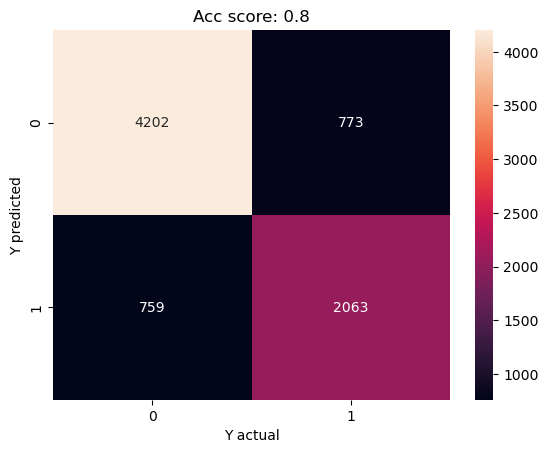

In [88]:
plot_confusion_matrix(y_test, y_pred)

In [89]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.84      0.85      4975
           1       0.73      0.73      0.73      2822

    accuracy                           0.80      7797
   macro avg       0.79      0.79      0.79      7797
weighted avg       0.80      0.80      0.80      7797



### --Evaluating accuracy on the training data
### --To get an idea of how well the model fits the training data and whether it is potentially overfitting or not

In [90]:
y_pred = rf_model.predict(X_train)


In [91]:
accuracy = accuracy_score(y_train, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 1.00


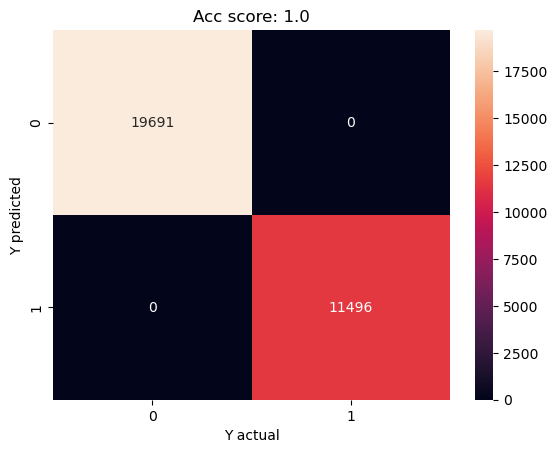

In [92]:
plot_confusion_matrix(y_train, y_pred)

In [93]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19691
           1       1.00      1.00      1.00     11496

    accuracy                           1.00     31187
   macro avg       1.00      1.00      1.00     31187
weighted avg       1.00      1.00      1.00     31187



# Gradient Boosting

In [94]:
gbm_model = GradientBoostingClassifier(random_state=42).fit(X_train, y_train)

### --Evaluating accuracy on the test data
### --To see how well the model performs on new, unseen data

In [95]:
y_pred = gbm_model.predict(X_test)

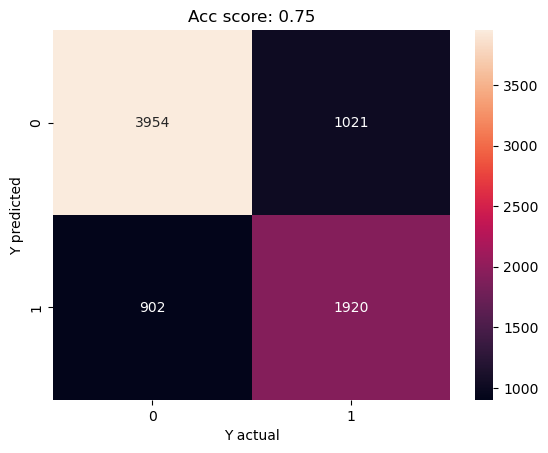

In [96]:
plot_confusion_matrix(y_test, y_pred)

In [97]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80      4975
           1       0.65      0.68      0.67      2822

    accuracy                           0.75      7797
   macro avg       0.73      0.74      0.74      7797
weighted avg       0.76      0.75      0.75      7797



### --Evaluating accuracy on the training data
### --To get an idea of how well the model fits the training data and whether it is potentially overfitting or not

In [98]:
y_pred = gbm_model.predict(X_train)

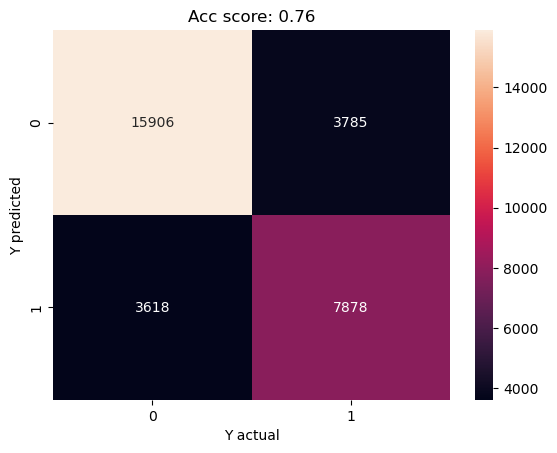

In [99]:
plot_confusion_matrix(y_train, y_pred)

In [100]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81     19691
           1       0.68      0.69      0.68     11496

    accuracy                           0.76     31187
   macro avg       0.75      0.75      0.75     31187
weighted avg       0.76      0.76      0.76     31187



## Model tuning

In [59]:
gbm_params = {"learning_rate": [0.2, 0.1, 0.01],
             "max_depth":[3,5,8,10],
             "n_estimators":[10, 100]}

In [60]:
gbm_model = GradientBoostingClassifier(random_state=42)
gbm_cv_model = GridSearchCV(gbm_model, gbm_params, cv=5, n_jobs=-1).fit(X_train,y_train)

In [61]:
gbm_cv_model.best_params_

{'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 100}

In [62]:
gbm_tuned = GradientBoostingClassifier(**gbm_cv_model.best_params_, random_state=42).fit(X_train,y_train)

### --Evaluating accuracy on the test data
### --To see how well the model performs on new, unseen data

In [63]:
y_pred = gbm_tuned.predict(X_test)

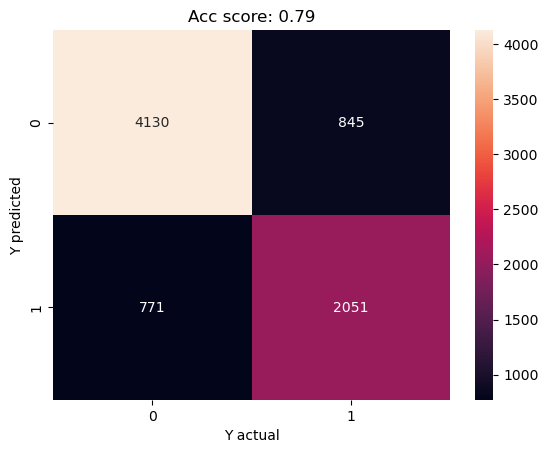

In [64]:
plot_confusion_matrix(y_test, y_pred)

In [65]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.83      0.84      4975
           1       0.71      0.73      0.72      2822

    accuracy                           0.79      7797
   macro avg       0.78      0.78      0.78      7797
weighted avg       0.79      0.79      0.79      7797



### --Evaluating accuracy on the training data
### --To get an idea of how well the model fits the training data and whether it is potentially overfitting or not

In [66]:
y_pred = gbm_tuned.predict(X_train)

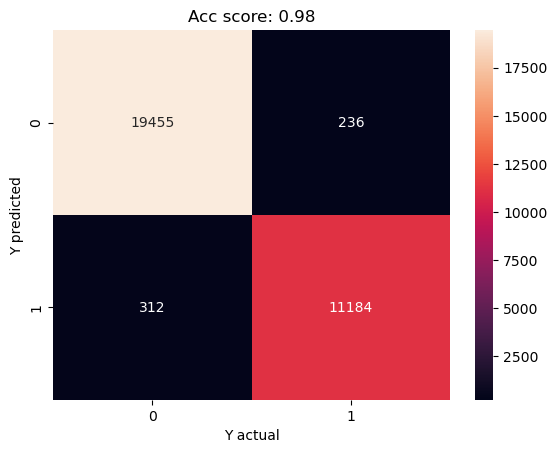

In [67]:
plot_confusion_matrix(y_train, y_pred)

In [68]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99     19691
           1       0.98      0.97      0.98     11496

    accuracy                           0.98     31187
   macro avg       0.98      0.98      0.98     31187
weighted avg       0.98      0.98      0.98     31187



## Model tuning again
## by using the parameters from best_params_

In [218]:
gbm_params = {"learning_rate": [0.15, 0.1, 0.05],
             "max_depth":[10,12,14],
             "n_estimators":[100,200,400]}

In [219]:
gbm_model = GradientBoostingClassifier(random_state=42)
gbm_cv_model = GridSearchCV(gbm_model, gbm_params, cv=5, n_jobs=-1).fit(X_train,y_train)

In [220]:
gbm_cv_model.best_params_

{'learning_rate': 0.05, 'max_depth': 10, 'n_estimators': 400}

In [221]:
gbm_tuned = GradientBoostingClassifier(**gbm_cv_model.best_params_, random_state=42).fit(X_train,y_train)


### --Evaluating accuracy on the test data
### --To see how well the model performs on new, unseen data

In [225]:
y_pred = gbm_tuned.predict(X_test)

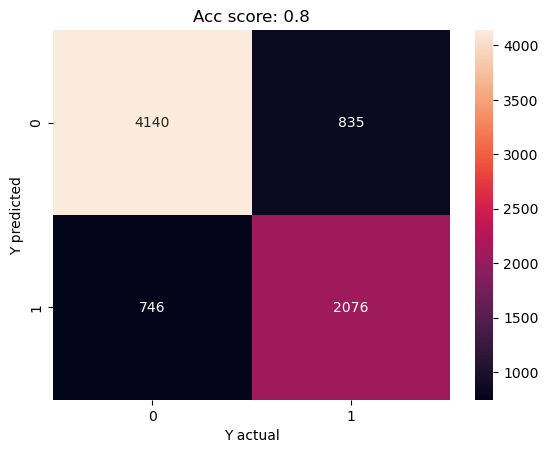

In [226]:
plot_confusion_matrix(y_test, y_pred)

In [227]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      4975
           1       0.71      0.74      0.72      2822

    accuracy                           0.80      7797
   macro avg       0.78      0.78      0.78      7797
weighted avg       0.80      0.80      0.80      7797



### --Evaluating accuracy on the training data
### --To get an idea of how well the model fits the training data and whether it is potentially overfitting or not

In [222]:
y_pred = gbm_tuned.predict(X_train)

In [223]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19691
           1       1.00      1.00      1.00     11496

    accuracy                           1.00     31187
   macro avg       1.00      1.00      1.00     31187
weighted avg       1.00      1.00      1.00     31187



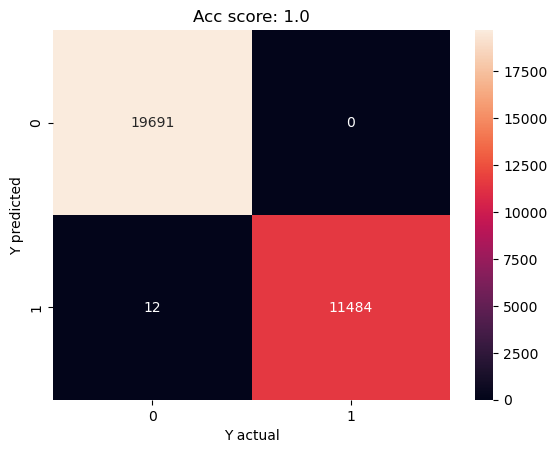

In [224]:
plot_confusion_matrix(y_train, y_pred)